# Workshop 1 - SVM

## Init

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import LinearSVC, LinearSVR, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
size=[4, 6, 1, 2.7]

In [3]:
def svm_coefs(model, scaler):
    if scaler == None:
        w = model.coef_[0]
        b = model.intercept_[0]
    else:
        w = model.coef_[0] / scaler.scale_
        b = model.decision_function([-scaler.mean_ / scaler.scale_])

    return (w, b)
    
def print_svm(model, X, y):
    hyperparameters = model.get_params()
    desired = ['C']
    builder = {}

    for param, value in hyperparameters.items():
        if param in desired:
            builder[param] = value

    print(f"SVM[C={builder['C']}]: accuracy={model.score(X, y)}")

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_svm(models:list, data=None, size=[0, 10, 0, 5], scaler=None):
    xmin, xmax = size[0], size[1]
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(10, 2.7), sharex=True, sharey=True)

    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])

    plt.xlabel("Petal length", fontsize=12)
    plt.ylabel("Petal width", fontsize=12)

    for i, model in enumerate(models):
        w, b = svm_coefs(model, scaler)

        x0 = np.linspace(xmin, xmax, 10)
        decision_boundary = -w[0]/w[1] * x0 - b/w[1]
        margin = 1/w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin

        hyperparameters = model.get_params()
        desired = ['C', 'loss']
        builder = {}

        for param, value in hyperparameters.items():
            if param in desired:
                builder[param] = value

        print(f"SVM[C={builder['C']}, loss={builder['loss']}]: w={w}, b={b}, margin={margin}")

        if data != None:
            X, y = data
            axes[i].plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Virginica")
            axes[i].plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Versicolor")

        #svs = model.support_vectors_
        #plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
        axes[i].plot(x0, decision_boundary, "k-", linewidth=2)
        axes[i].plot(x0, gutter_up, "k--", linewidth=2)
        axes[i].plot(x0, gutter_down, "k--", linewidth=2)
        plt.axis(size)

## Linear Models

### Sensitivity to feature scales

SVM[C=10, loss=hinge]: w=[0.78664982 3.3379454 ], b=-9.33487574180716, margin=0.2995854875261146


/home/kodascii/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


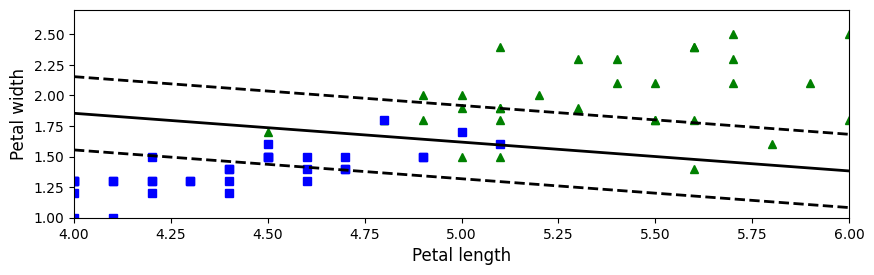

In [4]:
svm_clf = LinearSVC(C=10, dual='auto', loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)

plot_svm(models=[svm_clf], data=(X_train, y_train), size=size)

### Large margin versus fewer margin violations (`C` hyperparameter)

In [5]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, dual='auto', loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, dual='auto', loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf1),
])
scaled_svm_clf2 = Pipeline([
    ("scaler", scaler),
    ("linear_svc", svm_clf2),
])

scaled_svm_clf1.fit(X_train, y_train)
scaled_svm_clf2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, dual='auto', loss='hinge', random_state=42))])

In [6]:
# Evaluating both models
print_svm(svm_clf1, X_test, y_test)
print_svm(svm_clf2, X_test, y_test)

SVM[C=1]: accuracy=0.36666666666666664
SVM[C=100]: accuracy=0.36666666666666664


SVM[C=1, loss=hinge]: w=[0.88084678 2.84985696], b=[-8.97434192], margin=0.35089480424223723
SVM[C=100, loss=hinge]: w=[2.85705111 5.7139968 ], b=[-22.99908175], margin=0.1750088485450191


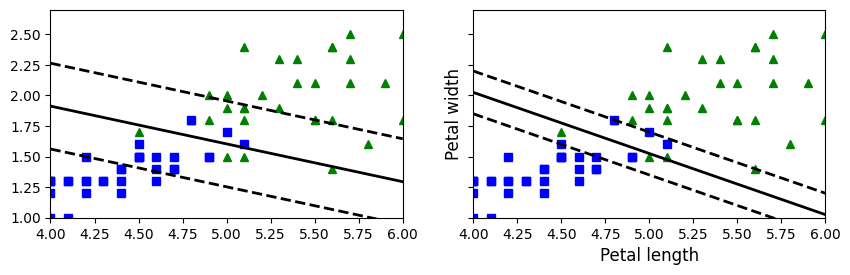

In [7]:
plot_svm(models=[svm_clf1, svm_clf2], data=(X_train, y_train), size=size, scaler=scaler)

## Polynomial SVM Classification

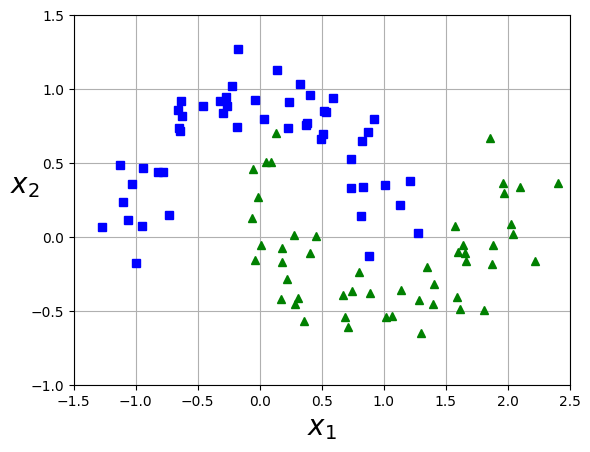

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [9]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", dual='auto', random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/home/kodascii/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/kodascii/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

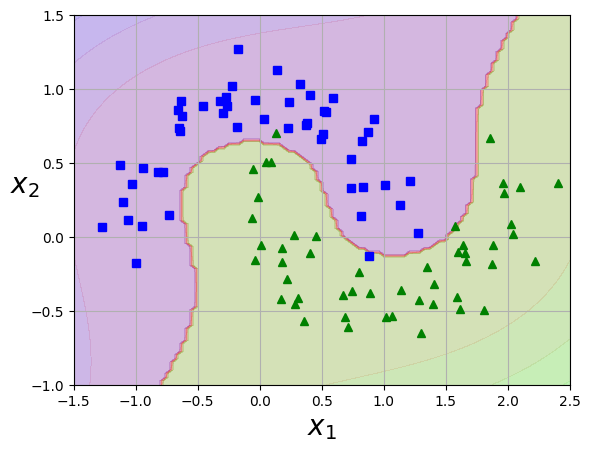

In [10]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## SVM Regression

In [11]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

### Linear SVR

In [12]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [13]:
svm_reg = LinearSVR(epsilon=1.5, dual='auto', random_state=42)
svm_reg.fit(X, y)

LinearSVR(dual='auto', epsilon=1.5, random_state=42)

In [14]:
svm_reg1 = LinearSVR(epsilon=1.5, dual='auto', random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, dual='auto', random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

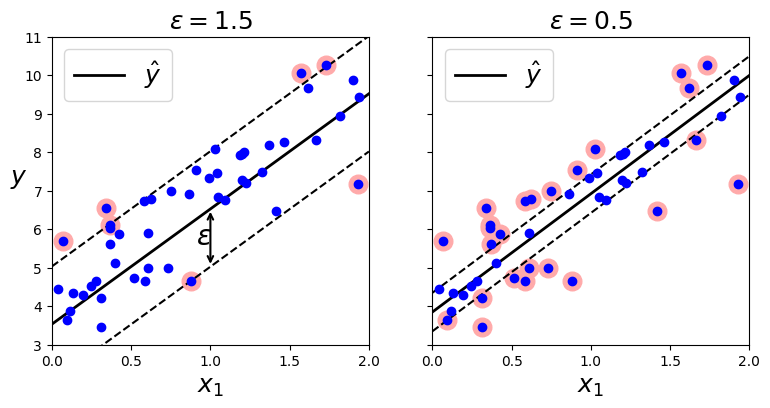

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

### Polynomial SVR

In [16]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [17]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

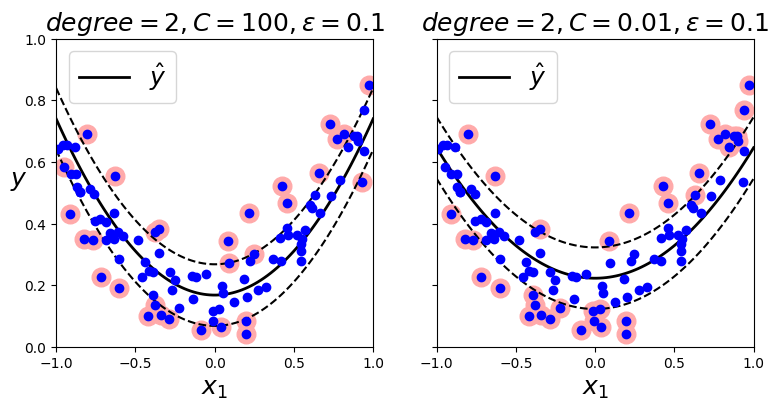

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon = {svm_poly_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon = {svm_poly_reg2.epsilon}$", fontsize=18)

plt.show()